## Day 5

https://adventofcode.com/2024/day/5

In [4]:
from collections import defaultdict

def read_input_05(filename):
    f = open(filename)
    l = f.read().split("\n\n")
    rules = defaultdict(list)
    for r in l[0].split():
        [a,b] = [int(d) for d in r.split("|")]
        rules[a].append(b)
    updates = []
    for p in l[1].split():
        updates.append([int(d) for d in p.split(",")])
    return rules, updates

In [5]:
import functools

def solve05(filename,part=1):
    rules, updates = read_input_05(filename)
    def compare(a,b):
        if b in rules[a]: return -1
        if a in rules[b]: return 1
    s = 0
    for u in updates:
        usort = sorted(u,key=functools.cmp_to_key(compare))
        if part==1:
            if usort==u:
                s += u[len(u)//2]
        elif part==2:
            if usort!=u:
                s += usort[len(usort)//2]
    return s

In [6]:
print("Test 1:", solve05("examples/example05.txt",part=1))
print("Part 1:", solve05("AOC2024inputs/input05.txt",part=1))

Test 1: 143
Part 1: 4578


In [7]:
print("Test 2:", solve05("examples/example05.txt",part=2))
print("Part 2:", solve05("AOC2024inputs/input05.txt",part=2))

Test 2: 123
Part 2: 6179


In [8]:
def bubblesort(l):
    while True:
        swap = False
        for i in range(len(l)-1):
            if l[i]>l[i+1]:
                l[i],l[i+1] = l[i+1],l[i]
                swap = True
        if not swap:
            return l

l = [93, 4, 2, 6, 11, 78, 23]
bubblesort(l)

[2, 4, 6, 11, 23, 78, 93]

In [9]:
def solve05_mybubblesort(filename,part=1):
    
    rules, updates = read_input_05(filename)

    def compare(a,b):
        if b in rules[a]: return -1
        if a in rules[b]: return 1
    
    def bubblesort_compare(_l):
        l = list(_l)
        while True:
            swap = False
            for i in range(len(l)-1):
                if compare(l[i],l[i+1])==1:
                    l[i],l[i+1] = l[i+1],l[i]
                    swap = True
            if not swap:
                return l

    s = 0
    for u in updates:
        usort = bubblesort_compare(u)
        if part==1:
            if usort==u:
                s += u[len(u)//2]
        elif part==2:
            if usort!=u:
                s += usort[len(usort)//2]
    return s

In [10]:
print("Test 1:", solve05_mybubblesort("examples/example05.txt",part=1))
print("Part 1:", solve05_mybubblesort("AOC2024inputs/input05.txt",part=1))
print("Test 2:", solve05_mybubblesort("examples/example05.txt",part=2))
print("Part 2:", solve05_mybubblesort("AOC2024inputs/input05.txt",part=2))

Test 1: 143
Part 1: 4578
Test 2: 123
Part 2: 6179


In [41]:
import networkx as nx
import matplotlib.pyplot as plt

rules, updates = read_input_05("AOC2024inputs/input05.txt")
#rules, updates = read_input_05("examples/example05.txt")

G = nx.DiGraph()
for k in rules.keys():
    for g in rules[k]:
        G.add_edge(k,g)

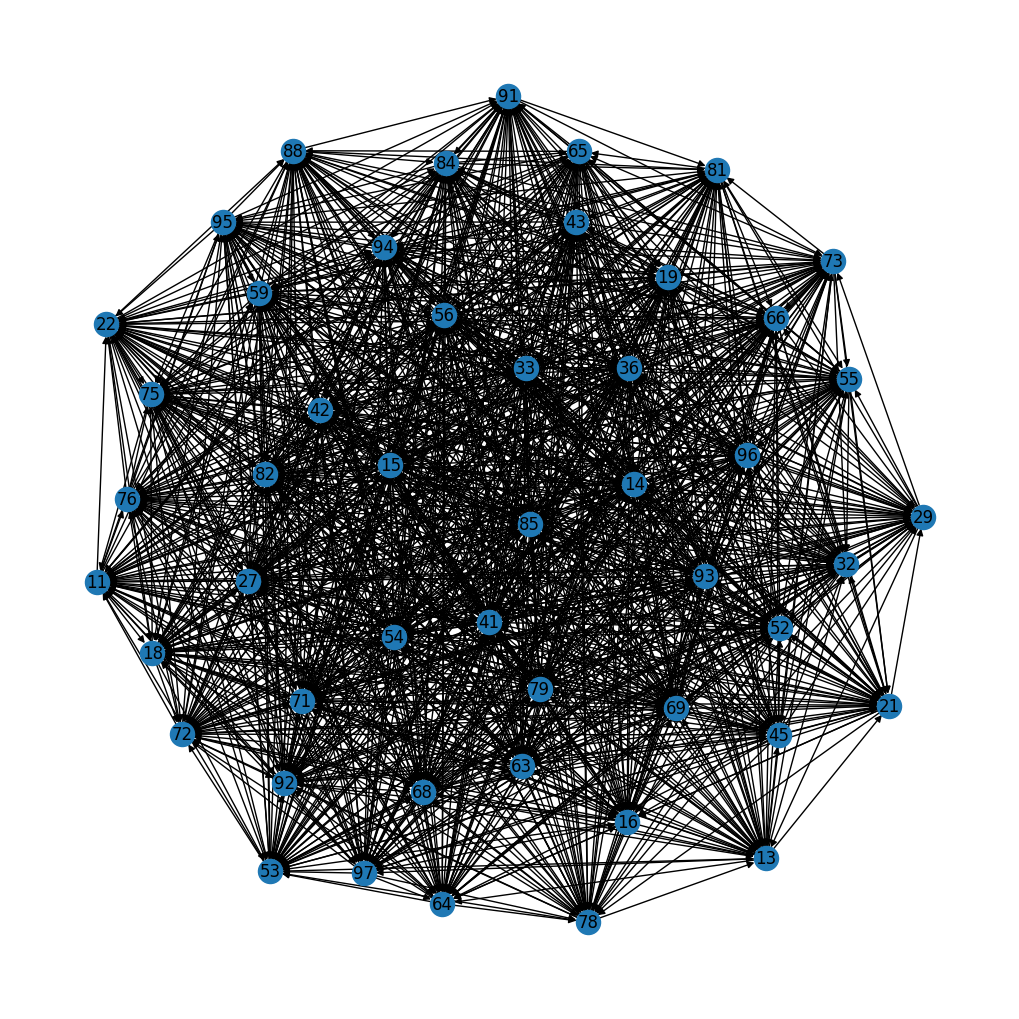

In [42]:
nx.draw(G, with_labels=True)

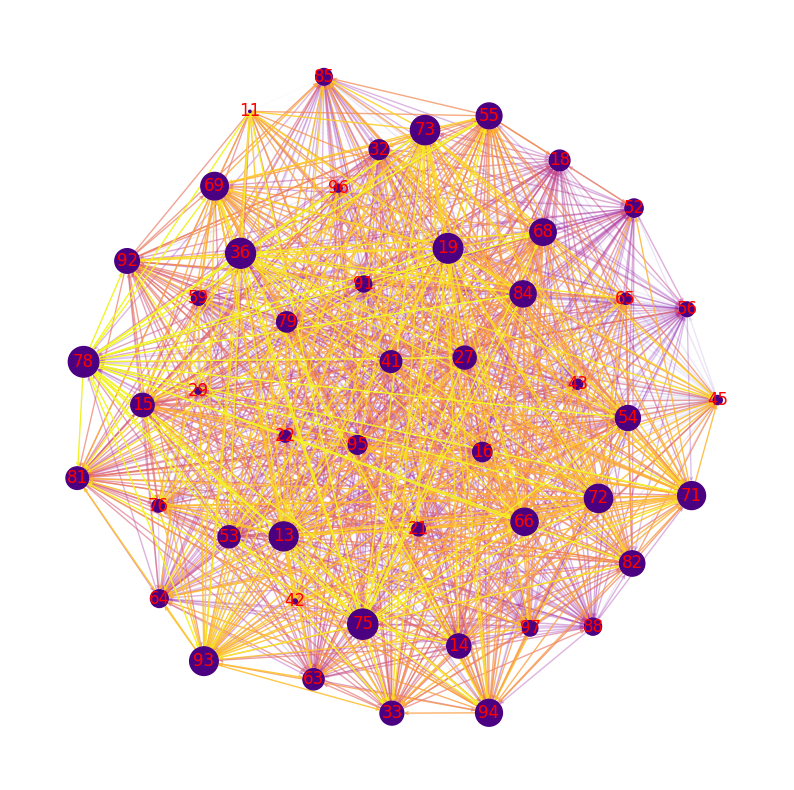

In [43]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

seed = 13648  # Seed random number generators for reproducibility
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

labels = nx.draw_networkx_labels(G, pos, font_color="red")
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=5,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=1,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()

plt.show()